## Business understanding

This Notebook created to complete the "Data science blog post" project for Udactiy Data scientist Nanodegree

The dataset chosen for this project: https://www.kaggle.com/airbnb/seattle/data, 
it describes the listing activity of homestays in Seattle, WA

## Data Understanding

The following Airbnb activity is included in this Seattle dataset: 
- Listings: including full descriptions and average review score 
- Reviews: including unique id for each reviewer and detailed comments 
- Calendar: including listing id and the price and availability for that day

## Prepare Data

###  Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load Calendar Dataset
calendar = pd.read_csv('calendar.csv')

In [3]:
#Load Listing Dataset
listing = pd.read_csv('listings.csv')

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Data Cleaning 


In [6]:
# Remove Dolar sign & Nans
calendar[['price']] = calendar[['price']].replace('[\$,]','',regex=True).astype(float)
calendar = calendar.dropna()

In [7]:
listing.price = listing.price.str.replace('$', '').str.replace(',', '')
listing['price'] = listing['price'].astype(float)

In [8]:
listing = listing.dropna(subset=['review_scores_value'])

In [9]:
listing["review_scores_value"].isnull().mean()
listing = listing[~listing["review_scores_value"].isnull()]

### Categorical data

In [10]:
categorical = ['object']
cat = listing.select_dtypes(include=categorical)
print(len(cat))
cat.columns

3162


Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [11]:
cat_columns = ['requires_license', 
               'jurisdiction_names', 
               'instant_bookable', 
               'cancellation_policy']
cat = pd.get_dummies(listing[cat_columns])

In [12]:
def dummy_data(df, cat_columns, dummies):
    '''
    INPUT:
    df: categorical variables to dummy
    cat_columns: categorical columns
    dummies - Boolean to dummy nan categorical values
    
    OUTPUT:
    df: new dataframe 
    '''
    for col in  cat_columns:
        try:
            df = pd.concat([df.drop(col, axis=1), 
                           pd.get_dummies(df[col], prefix=col, 
                           prefix_sep='_', 
                           drop_first=True, 
                           dummies=dummies)], axis=1)
        except:
            continue
    return df

In [13]:
listing = dummy_data(listing, cat_columns, dummies=False)

### Missing data

In [14]:
df = listing
missing_values = df.columns[df.isnull().mean() > 0]
print(len(missing_values))

26


In [15]:
print(missing_values)

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'zipcode', 'bathrooms',
       'bedrooms', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'license'],
      dtype='object')


## Data Modeling

- Analysis of the dataset that focus on the date, price, and rating with visualization

### The Most Busy time in the year?

In [16]:
calendar['date'] = pd.to_datetime(calendar['date'])
price_date = calendar.groupby(calendar['date'].dt.strftime('%B'),sort=False)['price'].mean()

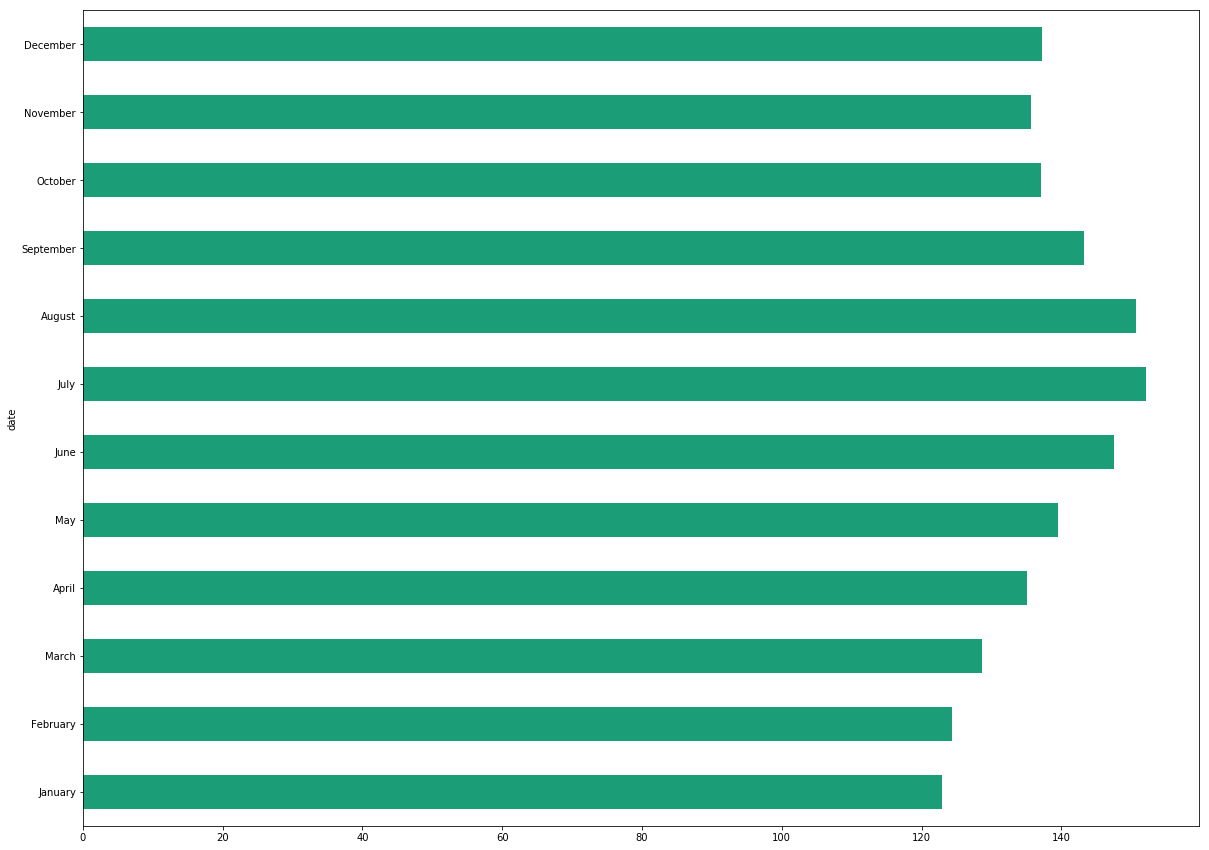

In [17]:
#visualize
price_date.plot(kind ='barh',figsize =(20,15), colormap="Dark2");

Based on the time-series chart above the busiest time is in summer (Jul-Aug) which cause in increas the price

### Is the Price affect the rating?

In [21]:
df[['price','review_scores_value']].head(30)

,price,review_scores_value
0,85.0,10.0
1,150.0,10.0
2,975.0,10.0
4,450.0,9.0
5,120.0,10.0
6,80.0,10.0
7,60.0,10.0
8,90.0,10.0
9,150.0,9.0
10,95.0,10.0


Based on the above table we can say that the price does not affect the rating 

### The most given "Rating" ?

In [22]:
fill = lambda x : 0 if str(x) == "nan" else int(x)
rating = df["review_scores_value"].apply(fill).value_counts()
print(rating)

10    1775
9     1137
8      190
7       38
6       16
4        4
5        1
2        1
Name: review_scores_value, dtype: int64


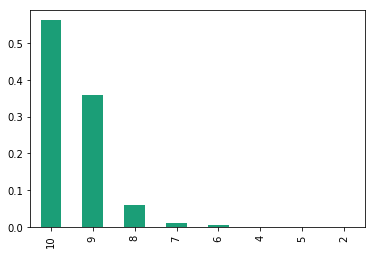

In [20]:
#visualize
rating_list = rating/df.shape[0]
rating_list.plot(kind='bar', stacked=True ,colormap='Dark2');

Based on the plot above people rarely give a low rating and tend mor to give 10-9 

## Overall  Conclusion from the analysis:

- The price does not affect the rating
- People tend to give a more high rating
- Summertime is busiest 
- Highest price during Summertime